In [4]:
import numpy as np
import os
from wavebench import wavebench_dataset_path
import matplotlib.pyplot as plt
is_dataset = os.path.join(wavebench_dataset_path, "time_varying/is")


In [14]:
initial_pressure_dataset = np.memmap(
    f'{is_dataset}/initial_pressure_dataset.npy', mode='r',
    shape=(3000, 512, 512), dtype=np.float32)

boundary_measurement_dataset = np.memmap(
    f'{is_dataset}/boundary_measurement_dataset.npy', mode='r',
    shape=(3000, 1334, 512), dtype=np.float32)



In [15]:
# from torchvision.transforms import Resize
import torch
import torch.nn.functional as F
from einops import rearrange


boundary_measurement_dataset = torch.from_numpy(
    np.array(boundary_measurement_dataset)
    
)

boundary_measurement_dataset = rearrange(
    boundary_measurement_dataset, 'n h w -> n 1 h w')

out = F.interpolate(boundary_measurement_dataset, (512,512))





In [12]:
out.shape




torch.Size([3000, 1, 1334, 512])

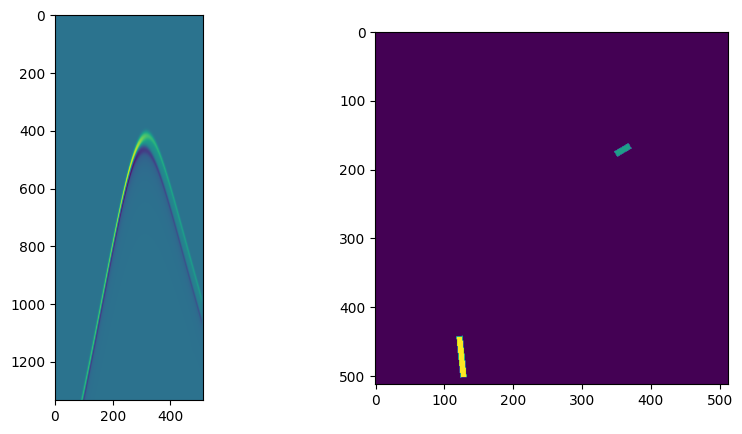

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

sample_idx = 20




axes[0].imshow(np.array(boundary_measurement_dataset)[sample_idx] )
axes[1].imshow(np.array(initial_pressure_dataset)[sample_idx] )


